# **Методы аппроксимации в интерполяции и прогнозировании цен NVIDIA**

## **Введение**
В этой тетради мы рассмотрим несколько методов интерполяции и аппроксимации, применяемых к набору данных, представляющему общие данные корпорации NVIDIA. Цель состоит в том, чтобы повысить точность прогнозов с помощью различных математических моделей.

### **Цели:**
- Применить различные методы аппроксимации к заданному набору данных.
- Проанализировать результаты этих моделей.
- Сравнить эффективность каждого метода.
- Использовать библиотеки Python, такие как "numpy", "scipy", "matplotlib" и "pandas", для реализации моделей.
  
Методы, которые мы будем изучать, включают:
- **Интерполяцию полиномом Лагранжа**
- **Интерполяция полиномом Ньютона**
- **Интерполяция кубическим сплайном**
- **Аппроксимация методом наименьших квадратов**
- **Аппроксимация наименьшими модулями**
- **Сигмовидные методы аппроксимации**
- **Корни полинома Чебышева для улучшения интерполяции**

---

Установим пропущенные библиотеки

In [6]:
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install scipy

## **1. Загружаем датасет**

Мы начнем с загрузки и проверки набора данных. Набор данных содержит значения данные о стоимости акций NVIDIA (1/22/1999 - 11/16/2022) и может быть использован для дальнейшего анализа инвестиций.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('NVIDIA Corporation.csv', index_col='Date', parse_dates=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-22,0.488281,0.388021,0.437500,0.410156,271468800,0.376518
1999-01-25,0.458333,0.410156,0.442708,0.453125,51048000,0.415963
1999-01-26,0.467448,0.411458,0.458333,0.417969,34320000,0.383690
1999-01-27,0.429688,0.395833,0.419271,0.416667,24436800,0.382495
1999-01-28,0.419271,0.412760,0.416667,0.415365,22752000,0.381300


In [ ]:
df.columns  # if you want to have Date as a column instead of index, then remove argument "index_col='Date' from read_csv function"

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

---

## **2. Визуализируем данные**

Давайте построим график данных, чтобы получить представление о их поведении.

<Axes: xlabel='Date'>

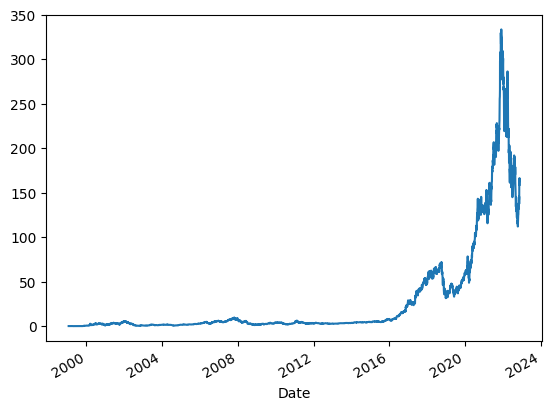

In [4]:
# Simplest way to plot data frame
df['Close'].plot()

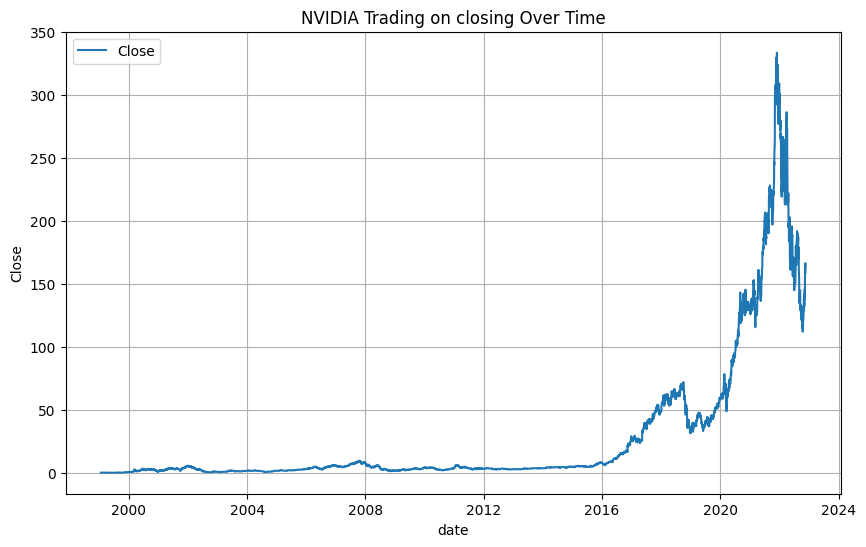

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close')
# plt.scatter(df['date'], df['Close'], color='red', label='Data Points')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('NVIDIA Trading on closing Over Time')
plt.legend()
plt.grid(True)
plt.show()

---

## **3. Интерполяция полиномом Лагранжа**

### Обзор метода:
Интерполяция Лагранжа - это метод построения многочлена, который проходит через заданный набор точек данных.

### Реализация:

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

Мы ограничиваем количество точек для интерполяции, потому что в противном случае у нас будет полином в степени 5000+, построение и последующее использование которого займет огромное количество времени. Мы предполагаем, что наибольшие и наименьшие точки будут влиять на интерполяцию больше, чем другие, но на самом деле это означает, что мы строим интерполяцию на основе выбросов, что на практике обычно неверно.

In [43]:
# Select the 5 highest and 5 lowest points based on 'Close' values
df_top5_high = df.nlargest(5, 'Close')
df_top5_low = df.nsmallest(5, 'Close')
df_top10 = pd.concat([df_top5_high, df_top5_low]).sort_index()
# print(df_top10)
print(len(df_top10))

10


In [ ]:
# Convert index to numerical values for interpolation
dates_numeric = df_top10.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Create the Lagrange interpolating polynomial using the top 10 points
poly_lagrange = lagrange(dates_numeric, df_top10['Close'])
print(poly_lagrange)

           9             8             7            6             5
1.755e-66 x - 1.964e-56 x + 9.672e-47 x - 2.75e-37 x + 4.976e-28 x
              4             3         2
 - 5.942e-19 x + 4.683e-10 x - 0.235 x + 6.813e+07 x - 8.703e+15


C:\Users\olgap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_interpolate.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pt = poly1d(w[j])


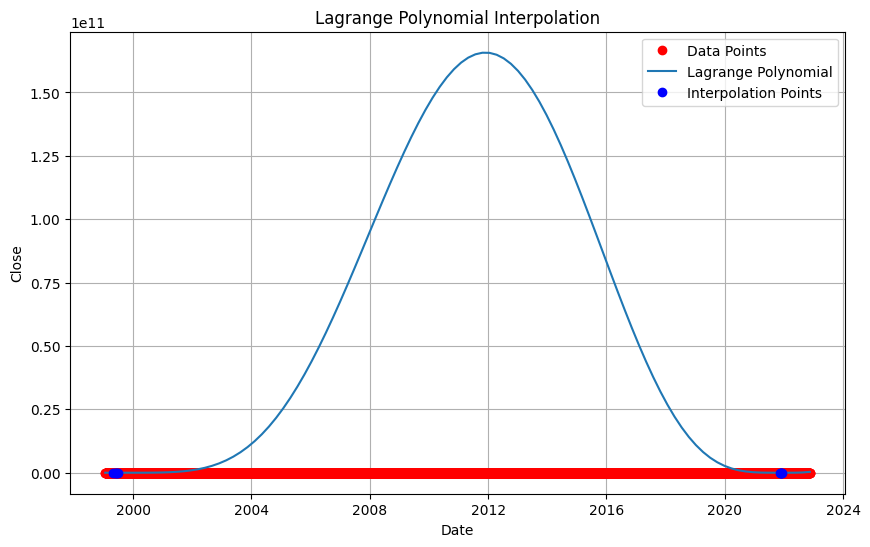

In [ ]:
# Define a range of dates for plotting the interpolation
date_range = np.linspace(df.index[0].value // 10**9, df.index[-1].value // 10**9, 100)

# Calculate values by interpolation polynomial 
closing_lagrange = poly_lagrange(date_range)
# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_lagrange, label='Lagrange Polynomial')
plt.plot(df_top10.index, df_top10['Close'], 'bo', label='Interpolation Points')  # Add interpolation points
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Lagrange Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()

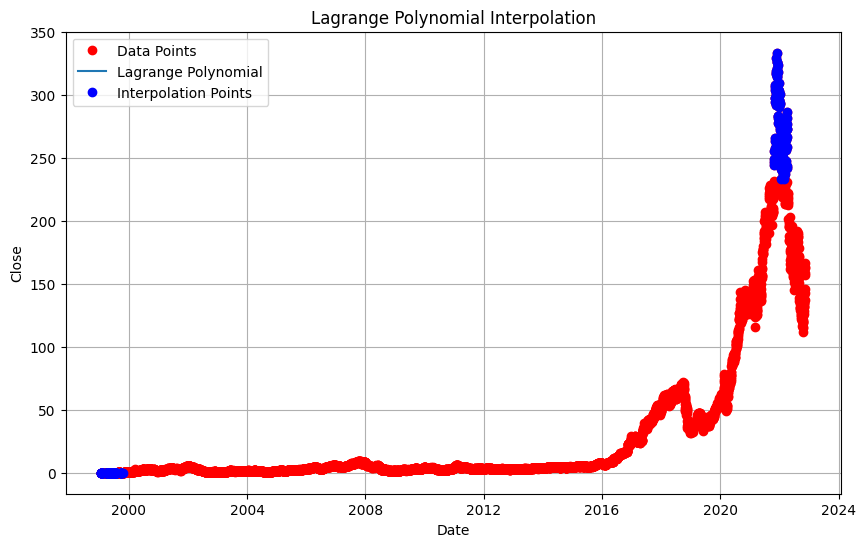

### Задача:
- Проанализируйте поведение интерполяции полиномом Лагранжа и ее пригодность для вашего набора данных.
- Попробуйте увеличить или уменьшить количество точек данных, чтобы увидеть, как это повлияет на интерполяцию.

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

Интерполяция полиномом Лагранжа является эффективным инструментом для создания многочленов, которые проходят через определенные точки.

Преимущества:
1. Полином Лагранжа точно соответствует всем заданным точкам, что делает его полезным для задач, где критична высокая точность.
2. Метод легко реализуется с помощью библиотек, таких как NumPy и SciPy.

Недостатки:

1.  При использовании большого количества равномерно распределенных точек полином может начать осциллировать между ними, что приводит к значительным ошибкам интерполяции.
2.  При добавлении множества точек степень полинома возрастает, что увеличивает вычислительную нагрузку и затраты по времени.

 Увеличение количества точек:

   • Увеличив количество точек (например, до 20 или 30), можно получить более гладкую кривую, но возникает риск осцилляций. Это следует проверить визуально.

   • Можно применить методы сглаживания или другие методы интерполяции, чтобы минимизировать этот эффект.

 Уменьшение количества точек:

   • Снизив количество точек до 3 или 4, можно достичь большей устойчивости интерполяции, но при этом потеряется информация о поведении между ними.

   • Это может быть полезно для получения грубой оценки тренда данных.

---

## **4. Интерполяция полиномом Ньютона**

### Обзор метода:
Метод Ньютона позволяет итеративно строить интерполяционный полином и в некоторых случаях может быть более стабильным, чем метод Лагранжа.

### Реализация:

In [50]:
from scipy.interpolate import BarycentricInterpolator

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

Мы ограничиваем количество точек для интерполяции, потому что в противном случае у нас будет полином в степени 5000+, построение и последующее использование которого займет огромное количество времени. Мы предполагаем, что наибольшие и наименьшие точки будут влиять на интерполяцию больше, чем другие, но на самом деле это означает, что мы строим интерполяцию на основе выбросов, что на практике обычно неверно.

In [51]:
# Select the 5 highest and 5 lowest points based on 'Close' values
df_top5_high = df.nlargest(5, 'Close')
df_top5_low = df.nsmallest(5, 'Close')
df_top10 = pd.concat([df_top5_high, df_top5_low]).sort_index()
# print(df_top10)
print(len(df_top10))

10


In [ ]:
# Convert index to numerical values for interpolation
dates_numeric = df_top10.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Create the Newton interpolator (using Barycentric for simplicity)
newton_interpolator = BarycentricInterpolator(dates_numeric, df_top10['Close'])

# Calculate interpolated values
closing_newton = newton_interpolator(date_range)


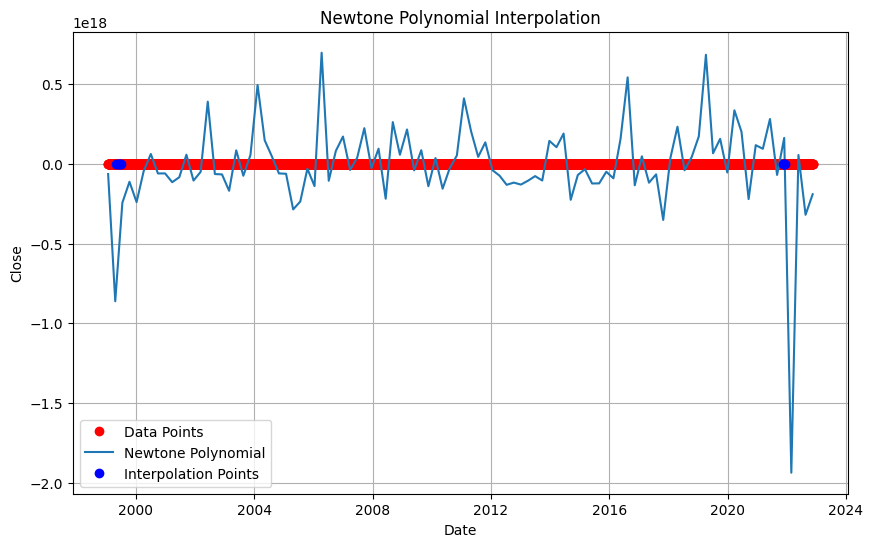

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_newton, label='Newtone Polynomial')
plt.plot(df_top10.index, df_top10['Close'], 'bo', label='Interpolation Points')  # Add interpolation points
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Newtone Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()

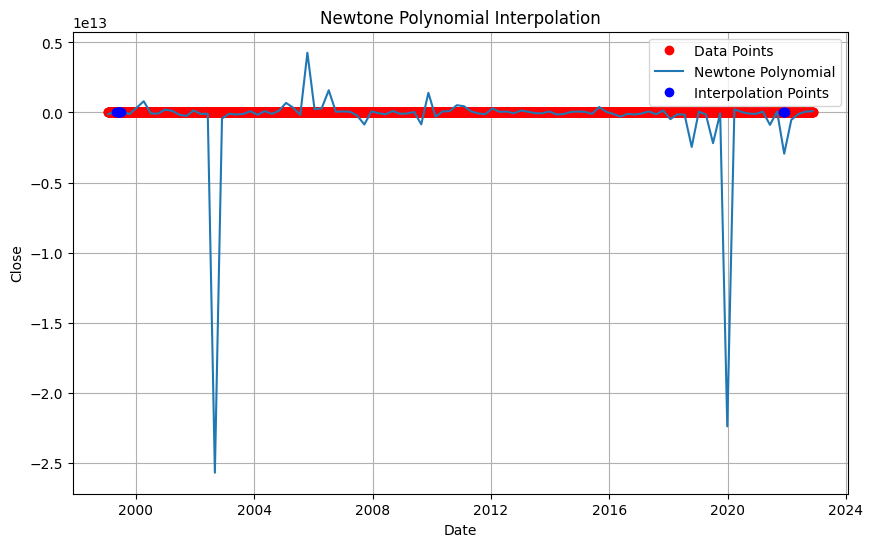

### Задание:
- Сравните результаты применения полинома Ньютона с полиномом Лагранжа. В чем основные различия?
- Что происходит, когда вы меняете порядок интерполяции?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

1. Форма Представления:

• Полином Лагранжа: Он представлен в виде суммы, где каждый элемент зависит от всех интерполируемых точек. Это может вызвать значительные вычислительные затраты, особенно при увеличении их количества.

• Полином Ньютона: Этот метод основан на разделенных разностях и позволяет строить полином поэтапно. Это делает его более практичным для добавления новых точек, так как нет необходимости пересчитывать весь полином заново.

2. Стабильность

• Полином Ньютона, особенно в барицентрической интерполяции, обычно демонстрирует большую устойчивость к колебаниям по сравнению с полиномом Лагранжа, особенно при использовании большого числа точек. Это связано с его способностью минимизировать эффект Рунге.

3. Эффективность

• Полином Ньютона может обеспечивать лучшую производительность в вычислениях, так как избегает повторных вычислений при добавлении новых узлов. В то время как полином Лагранжа требует пересчета всех коэффициентов каждый раз, когда добавляется новая точка.

4. Чувствительность к выбросам

• Оба подхода могут быть подвержены влиянию выбросов, однако полином Ньютона может проявлять большую устойчивость благодаря своей внутренней структуре.



1. Увеличение порядка интерполяции

• С увеличением числа точек оба метода могут начать осциллировать, особенно полином Лагранжа, что приводит к ошибкам в интерполяции. Полином Ньютона также может осциллировать, но менее заметно благодаря своей конструкции.

2. Уменьшение порядка интерполяции

• Снижение числа точек позволяет добиться более гладкого и стабильного результата, но приводит к потере информации. Для обоих методов это делает модель проще, но менее точной.

---

## **5. Интерполяция кубическими сплайнами**

### Обзор метода:
Интерполяция кубическими сплайнами сопоставляет данные с кусочно-кубической функцией, обеспечивая плавные переходы между точками. Этот метод часто обеспечивает более плавную аппроксимацию, чем полиномиальные методы.

### Реализация:

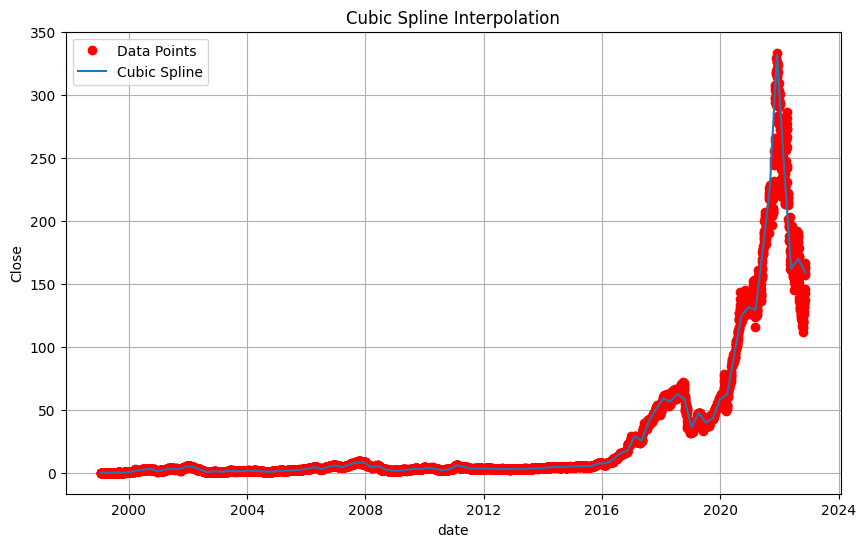

In [69]:
from scipy.interpolate import CubicSpline

# Create the Cubic Spline interpolator
cubic_spline = CubicSpline(df.index, df['Close'])

# Calculate interpolated values
closing_spline = cubic_spline(date_range)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_spline, label='Cubic Spline')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Сравните кубическую сплайновую интерполяцию с другими методами. Как она позволяет более эффективно обрабатывать данные?
- Как бы вы применили этот метод к точкам данных с выбросами?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

1. Плавность: Кубические сплайны обеспечивают гладкие переходы между сегментами, сохраняют непрерывность функции и её производных. Полиномиальные методы могут иметь резкие изменения, что вызывает нежелательные осцилляции.

2. Число узлов: Кубические сплайны требуют меньше узлов для хорошей точности, что удобно для больших наборов данных.

3. Стабильность: Кубические сплайны более устойчивы к выбросам, в отличие от полиномов, которые могут искажаться из-за аномальных значений.

Масштабирование данных может помочь уменьшить влияние выбросов. Например, нормализация значений перед интерполяцией может сделать модель менее чувствительной к экстремальным значениям.

---

## **6. Аппроксимация методом наименьших квадратов**

### Обзор метода:
Приближение методом наименьших квадратов минимизирует сумму квадратов различий между наблюдаемыми точками данных и моделью.

### Реализация:

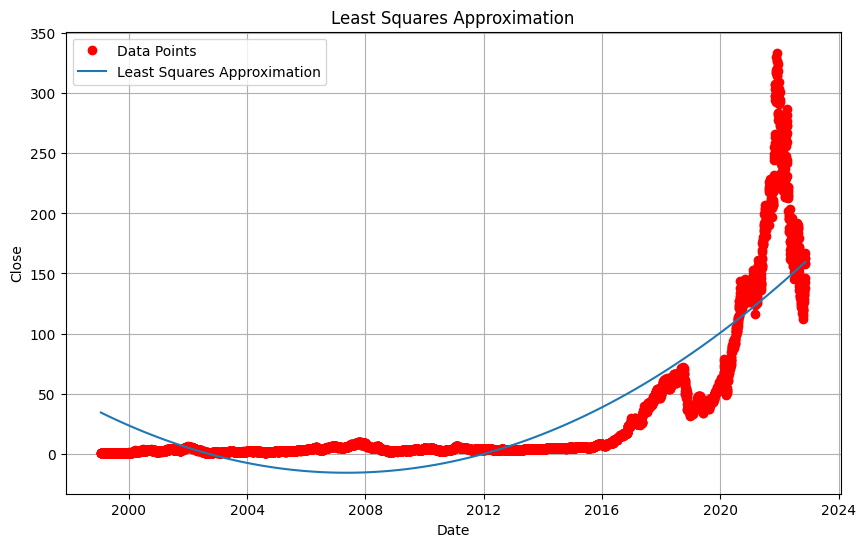

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import pandas as pd

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Fit a least squares polynomial of degree 2
p = Polynomial.fit(dates_numeric, df['Close'], 2)

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values
closing_least_squares = p(date_range)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_squares, label='Least Squares Approximation')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Least Squares Approximation')
plt.legend()
plt.grid(True)
plt.show()

Теперь попробуем выполнить тоже самое, но логарифмической функцией

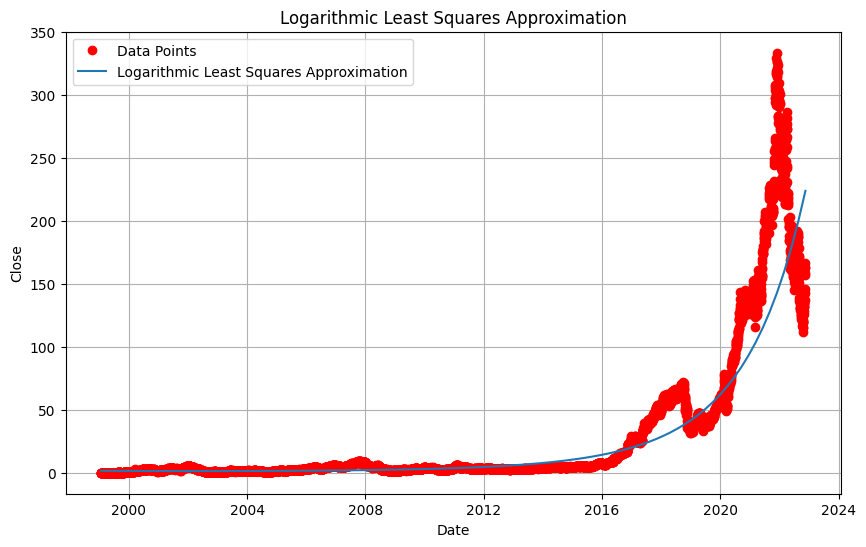

In [ ]:
# Logarithmic approximation for least squares method
# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Logarithmic approximation for least squares method
# Transform 'Close' values using the natural logarithm
log_close = np.log(df['Close'])

# Fit a least squares polynomial of degree 2 to the log-transformed data
p_log = Polynomial.fit(dates_numeric, log_close, 2)

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values for the log-transformed polynomial
log_close_least_squares = p_log(date_range)

# Convert back from log scale to original scale
log_close_least_squares = np.exp(log_close_least_squares)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, log_close_least_squares, label='Logarithmic Least Squares Approximation')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Logarithmic Least Squares Approximation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Попробуйте использовать разные степени многочлена. Как улучшается или ухудшается приближение?
- Дополнительно Вы можете попробовать использовать различные функции для аппроксимации (экспоненциальную, тригонометрическую и т.д.).

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

Полиномы более низкой степени могут быть более устойчивыми к шуму в данных, в то время как более высокие степени могут лучше подстраиваться под сложные зависимости. Экспоненциальные и тригонометрические функции также могут быть полезны в зависимости от характера данных.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import pandas as pd

# Пример данных 
# df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Преобразование индекса в числовые значения для подгонки полинома
dates_numeric = df.index.astype(np.int64) // 10**9  # Конвертация в секунды с начала эпохи

# Определение степеней полинома для тестирования
degrees = [1, 2, 3]

# Подготовка графика
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')

# Проход по степеням полинома
for degree in degrees:
    # Подгонка полинома методом наименьших квадратов
    p = Polynomial.fit(dates_numeric, df['Close'], degree)
    
    # Определение диапазона дат для построения аппроксимации
    date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)
    
    # Вычисление значений
    closing_least_squares = p(date_range)
    
    # Конвертация date_range обратно в datetime для построения графика
    date_range = pd.to_datetime(date_range * 10**9)
    
    # Построение графика
    plt.plot(date_range, closing_least_squares, label=f'Degree {degree}')

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Least Squares Approximation with Different Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()


---

## **7. Приближение по наименьшим модулям**

### Обзор метода:
Метод наименьших модулей минимизирует сумму абсолютных различий (а не квадратичных различий) между моделью и данными.

### Реализация:

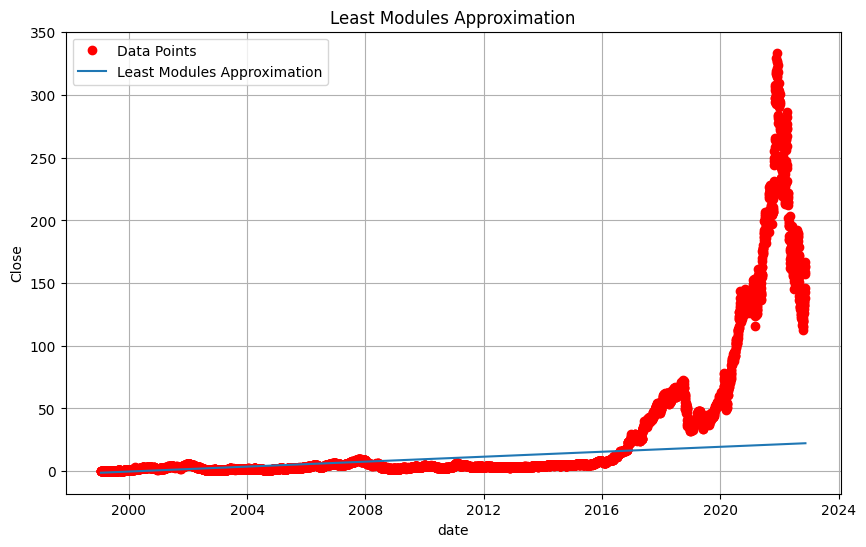

In [81]:
from scipy.optimize import minimize

def least_modules_model(x, years, close):
    # Simple linear model: f(x) = ax + b
    a, b = x
    return sum(abs(a * years + b - close))

# Initial guess for the parameters
initial_guess = [1, 1]

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Minimize the absolute difference (Least Modules)
result = minimize(least_modules_model, initial_guess, args=(dates_numeric, df['Close']))
a, b = result.x

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values
closing_least_modules = a * date_range + b

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_modules, label='Least Modules Approximation')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Least Modules Approximation')
plt.legend()
plt.grid(True)
plt.show()

### Задача:
- Как ведет себя метод наименьших модулей по сравнению с методом наименьших квадратов?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

Различия:

1. Цель:

• Метод наименьших квадратов (МНК) минимизирует сумму квадратов отклонений между предсказанными и фактическими значениями, что делает его чувствительным к выбросам.

• Метод наименьших моделей (МНМ) минимизирует сумму абсолютных отклонений, обеспечивая меньшую чувствительность к выбросам, так как все отклонения учитываются равномерно.

2. Чувствительность к выбросам:

• МНК может искажаться из-за выбросов, так как они значительно влияют на сумму квадратов.

• МНМ более устойчив к выбросам, поскольку не возводит отклонения в квадрат, и большие ошибки менее влияют на результат.

---

## **8. Сигмовидные методы аппроксимации**

### Обзор метода:
Сигмовидные функции часто используются для моделирования роста. Этот метод аппроксимирует данные логистической функцией.

### Реализация:

*Тем, кто найдёт и исправит ошибки в реализации, чтобы аппроксимации выглядели лучше - плюс в карму и в опыт* 😊

C:\Users\olgap\AppData\Local\Temp\ipykernel_25216\1082648639.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


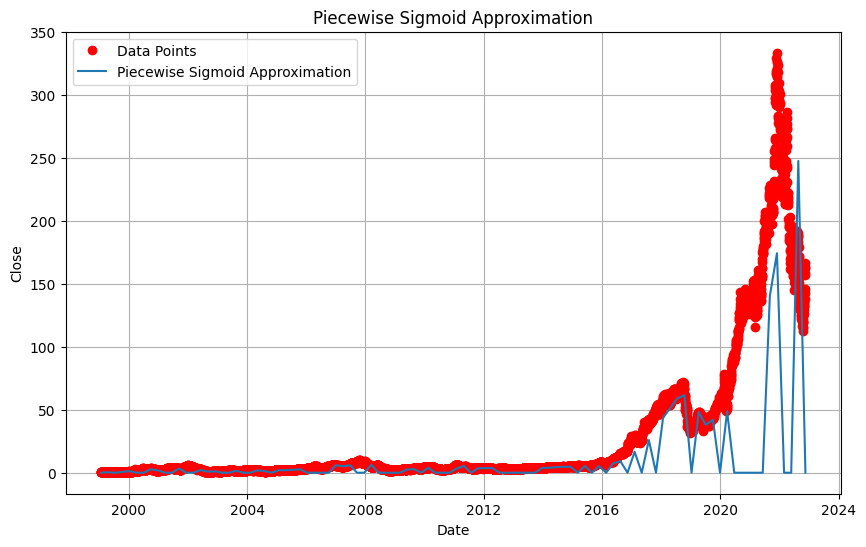

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit
import pandas as pd

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch
dates_numeric = np.array(dates_numeric)  # Convert to numpy array

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + expit(-x))

# Define the piecewise approximation function using a combination of sigmoid functions
def piecewise_approximation_function(x, params, n_pieces):
    piece_length = len(x) // n_pieces
    y = np.zeros_like(x, dtype=float)
    for i in range(n_pieces):
        start = i * piece_length
        end = (i + 1) * piece_length if i < n_pieces - 1 else len(x)
        a = params[i * 3]
        b = params[i * 3 + 1]
        c = params[i * 3 + 2]
        y[start:end] = c * sigmoid(a * x[start:end] + b)
    return y

# Define the loss function to minimize
def loss(params):
    n_pieces = len(params) // 3
    y_pred = piecewise_approximation_function(dates_numeric, params, n_pieces)
    return np.mean((df['Close'] - y_pred) ** 2)

# Initial parameters for optimization
n_pieces = 100  # Number of pieces to use
initial_params = np.random.randn(n_pieces * 3)

# Optimize the parameters to fit the data
result = minimize(loss, initial_params, method='L-BFGS-B')
optimized_params = result.x

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values for the optimized approximation function
closing_least_modules = piecewise_approximation_function(date_range, optimized_params, n_pieces)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_modules, label='Piecewise Sigmoid Approximation')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Piecewise Sigmoid Approximation')
plt.legend()
plt.grid(True)
plt.show()


### Задача:
- Насколько хорошо сигмовидная функция соответствует данным по сравнению с полиномиальными методами?
- Попробуйте настроить параметры, чтобы увидеть, как они влияют на кривую.

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

Сигмовидные функции могут хорошо соответствовать данным, особенно когда имеется ограниченный объем данных и важны предельные значения. Однако полиномиальные методы могут предлагать более гибкие способы аппроксимации при наличии сложных трендов, но также могут быть подвержены переобучению.

---

## **9. Корни полинома Чебышева для интерполяции**

### Обзор метода:
Полиномы Чебышева используются для минимизации погрешности аппроксимации. Используя их корни, вы можете выполнять более эффективную интерполяцию.

### Реализация:

In [ ]:
from numpy.polynomial.chebyshev import Chebyshev

# Convert index to numerical values for fitting the polynomial
dates_numeric = df.index.astype(np.int64) // 10**9  # Convert to seconds since epoch

# Chebyshev interpolation method
chebyshev_poly = Chebyshev.fit(dates_numeric, df['Close'], deg=3)

# Define a range of dates for plotting the approximation
date_range = np.linspace(dates_numeric[0], dates_numeric[-1], 100)

# Calculate values
closing_chebyshev = chebyshev_poly(date_range)

# Convert date_range back to datetime for plotting
date_range = pd.to_datetime(date_range * 10**9)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_chebyshev, label='Chebyshev Polynomial')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Chebyshev Polynomial Approximation')
plt.legend()
plt.grid(True)
plt.show()


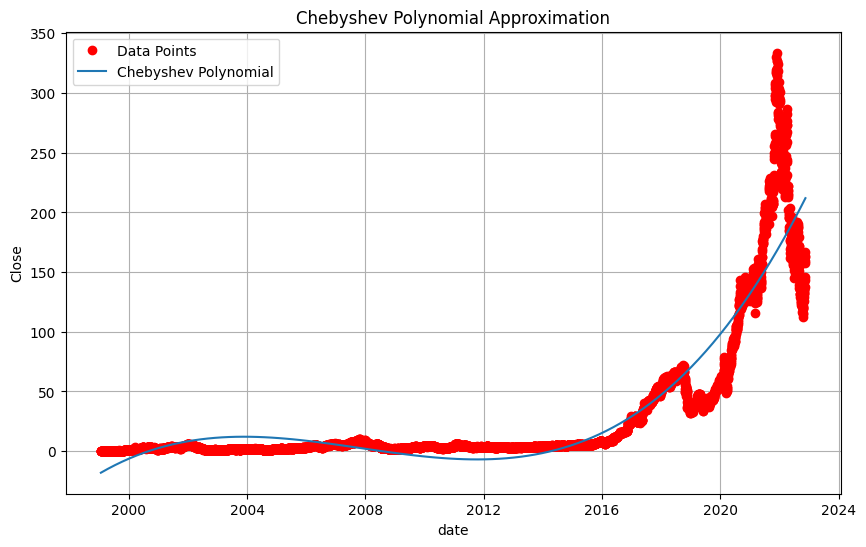

### Задача:
- Чем интерполяция по Чебышеву отличается от полиномиальной интерполяции? Какими преимуществами она обладает?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ

Интерполяция по Чебышеву использует полиномы Чебышева, которые минимизируют погрешность на заданном интервале, в отличие от обычной полиномиальной интерполяции. Преимущества метода:

1. Снижение эффекта Рунге: Полиномы обеспечивают стабильные результаты и уменьшают осцилляции на краях интервала.
   
2. Оптимальные узлы: Корни полиномов расположены так, чтобы минимизировать максимальную ошибку, что повышает эффективность интерполяции.

3. Ускоренная сходимость: Интерполяция по Чебышеву достигает заданной точности быстрее, требуя меньше узлов.

---

## **10. Заключение и анализ**

В этом разделе предлагается сравнить различные методы:
- Какой метод лучше всего подходит для данного набора данных?
- Какой метод является наиболее эффективным с точки зрения вычислений?
- Какая модель дает наиболее точные прогнозы при обобщении на невидимые данные?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ


На мой взгляд, для нашего набора данных наилучшим решением является интерполяция с помощью кубических сплайнов, так как она прекрасно отражает тенденции, присущие данным. Полиномиальная интерполяция, с другой стороны, демонстрирует наивысшую скорость вычислений. Однако я полагаю, что интерполяционный метод Чебышева способен обеспечить наиболее точные прогнозы.

---

## Экстра практика на тех же данных. Давайте попробуем провести экстра-поляцию!🧙

### Сначала давайте попробуем провести экстраполяцию теми же методами, что и раньше, и построить график результата

In [ ]:
# All polynomials built before:
polonomials = [poly_lagrange, newton_interpolator, cubic_spline, p, p_log, a, b, chebyshev_poly]
polonomial_labels = ['Lagrange', 'Newton', 'Spline', 'Least Squares', 'Logarithmic Least Squares', 'Least Modules', 'Sigmoid', 'Chebyshev'] 

In [ ]:
# Define a new range of dates for extrapolation
extrapolation_range = np.linspace(dates_numeric[-1], dates_numeric[-1] + (dates_numeric[-1] - dates_numeric[0]), 100)

# Calculate extrapolated values using the least squares polynomial
extrapolated_values = p(extrapolation_range)

# Convert extrapolation_range back to datetime for plotting
extrapolation_dates = pd.to_datetime(extrapolation_range * 10**9)

# Apply each polinomial to the extrapolation range
# YOUR CODE HERE

# Plot the original data and the extrapolated values by each of the polynomials
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], 'ro', label='Data Points')
plt.plot(date_range, closing_least_squares, label='Least Squares Approximation') # add more
plt.plot(extrapolation_dates, extrapolated_values, 'g--', label='Extrapolated Values')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Extrapolation using Least Squares Polynomial')
plt.legend()
plt.grid(True)
plt.show()

### А теперь попробуем добавить немного машинного обучения, чтобы предсказывать значения

Не надо бояться машинного обучения как чёрной магии, под капотом у неё всё те же численные методы (ака. вычислительная математика).

In [ ]:
%pip install sklearn
%pip install tensorflow

In [ ]:
output_var = pd.DataFrame(df['Close'])

In [ ]:
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

In [ ]:
feature_transform.shape

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

In [ ]:
y_pred= lstm.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

Какие выводы Вы можете сделать по этим примерам и по всей практической работе в целом? Что нового Вы лично для себя узнали?

ВАШ КОММЕНТАРИЙ ЗДЕСЬ